# EDA To Check BP Affect Over Streets and Streets Segments

MAKE SURE TO LOAD THE NEWEST FILES



In [276]:
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display
import leafmap

import time


# for handling files
import glob
import os


### Loading Quarters Data

In [277]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


#### Plotting Quarters

In [278]:
# ta_q['index'] = ta_q.index

# # Define a list of colors
# color_map = {
#     1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
#     5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
# }

# # Basic plotting
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot each shape with a different color from the list
# for idx, row in ta_q.iterrows():
#     color = color_map[row['krova']]  # Cycle through the colors list
#     gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

#     # Get the centroid of the polygon to place the text
#     centroid = row['geometry'].centroid
#     ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
#                 xytext=(3, 3), textcoords="offset points",
#                 fontsize=24, color='black')

# plt.show()

### Loading TA Accidents and TA Micro Mobility Accidents

In [279]:
# Exclude micro mobility
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23
micro_m = [SCOOTER, E_BICYCLE, BICYCLE]


In [280]:
# Load original accident data
i_m_h_ta_gdf = gpd.read_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

#### Removing 2024 from **i_m_h_ta_gdf**

In [281]:
# i_m_h_ta_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.accident_year == 2024)].copy()

In [282]:
# Accidents that are not MM
i_m_h_ta_no_mm_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].copy()

In [283]:
# Accidents that are just MM
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,house_number,accident_date,geometry
9,2013007807,32013007807,3,3,2,נהג נפגע,0,3,10-14,2,...,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,17.0,2013-11-13 07:45:00,POINT (669346.843 3554808.438)
16,2013007267,32013007267,3,3,2,נהג נפגע,0,8,35-39,2,...,לא מנועי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,100.0,2013-03-21 07:30:00,POINT (667430.497 3550607.707)
22,2013007376,32013007376,3,3,2,נהג נפגע,0,99,לא ידוע,0,...,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,9999.0,2013-10-15 07:45:00,POINT (667639.600 3548303.692)
45,2013008617,12013008617,1,1,2,נהג נפגע,0,9,40-44,1,...,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,80150620.0,NaN,2013-01-27 08:00:00,POINT (668252.144 3549651.377)
47,2013007701,32013007701,3,3,2,נהג נפגע,0,12,55-59,1,...,ישראלי,99.0,0.0,לא ידוע,1.0,קל,NaN,9999.0,2013-08-15 07:45:00,POINT (665986.377 3548206.911)


#### Plotting accidents

In [284]:
# fig, ax = plt.subplots(figsize=(10, 10))
# i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
# plt.show()

### Loading BP

In [285]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
display(bp_ta_bp_and_meta.head(5)), bp_ta_bp_and_meta.shape

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,miflas,date_created
0,1,95.10,14/08/2024 02:30:05,2012,נמיר מיוניצ'מן דרומה,None,"LINESTRING (669823.985 3557373.860, 669855.549...",2.5,דו סטרי,2012,None,None
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"LINESTRING (669232.834 3555478.027, 669169.381...",2.5,דו סטרי,2013,None,None
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"LINESTRING (669232.637 3555478.023, 669249.025...",2.1,דו סטרי,2004,None,None
3,4,659.20,14/08/2024 02:30:05,2018,"קק""ל מנמיר עד חיים לבנון",None,"LINESTRING (669354.261 3555417.055, 669410.178...",2.5,דו סטרי,2018,מדרכה,None
4,5,362.67,14/08/2024 02:30:05,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,"LINESTRING (669946.350 3555344.516, 669962.261...",2.0,דו סטרי,2018,None,30/06/2018


(None, (871, 12))

In [286]:
# fig, ax = plt.subplots(figsize=(10, 10))
# bp_ta_bp_and_meta.plot(ax=ax, color='blue' )
# plt.show()

#### Checking validity by lotting Quarters, Micro Mobility Accidents  and BP

In [287]:
i_m_h_ta_mm_gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Plotting accidents with BP and Quarters

In [288]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )

# plt.legend()
# plt.show()

## Loading streets data


In [289]:
ta_streets = gpd.read_parquet('./csv_tables/ta_street_corrected.parquet')
ta_streets

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (672865.880 3554095.253, 672895.216..."
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (666990.498 3551436.940, 667065.337..."
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (667879.712 3551424.162, 667940.741..."
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (669570.036 3550420.535, 669581.404..."
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (669329.153 3548322.758, 669409.403..."
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (665771.816 3547023.159, 665760.256..."
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (665585.719 3547178.152, 665627.936..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (665700.142 3547064.296, 665759.119..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (665087.059 3546677.092, 665075.120..."


#### Checking street length validity with google maps

In [290]:
# ta_streets[ta_streets.shemangli == 'MARGOLIN'].geometry.length.sum()

#### Plotting streets with BP and MM Accidents and  Quarters

In [291]:

# fig, ax = plt.subplots(figsize=(30, 30))

# ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# i_m_h_ta_mm_gdf.plot(ax=ax, color='black', marker='o', markersize=15 )


# plt.legend()
# plt.show()

Checking Location Accuracy

In [292]:
i_m_h_ta_gdf.location_accuracy.value_counts(normalize=True)

location_accuracy
1    0.514662
3    0.422110
2    0.063228
Name: proportion, dtype: float64

In [293]:
i_m_h_ta_mm_gdf.location_accuracy.value_counts(normalize=True)

location_accuracy
1    0.600367
3    0.377102
2    0.022531
Name: proportion, dtype: float64

In [294]:
i_m_h_ta_mm_gdf[i_m_h_ta_mm_gdf.accident_year.isin([2018,2019,2020,2021,2022,2023])].location_accuracy.value_counts(normalize=True)

location_accuracy
1    0.644453
3    0.335212
2    0.020334
Name: proportion, dtype: float64

1 = accurate coordinates<br>
2 = city center <br>
3 = street center

What we care is if the accident is accurate or if the accident is in the street center, why?

If the accident is in it's actual coordinates or if it's in the street center then that means it's in the quarter.

But a street can extend outside the quarter, so I need to make sure how many street intersect other quarters.

Currently I want to check street in 2 = city center, and will probably drop them.

In [295]:
i_m_h_ta_gdf[i_m_h_ta_gdf.location_accuracy == 2].x.value_counts()

x
180245.0    3094
180264.0    2585
180276.0    1265
178125.0      62
182556.0      57
184617.0      39
181651.0      21
181256.0      18
180108.0      16
177917.0      15
184141.0      14
179039.0      12
180029.0      10
185394.0       9
182785.0       9
184741.0       8
178949.0       6
181582.0       6
180697.0       6
184435.0       5
178005.0       5
180219.0       5
180560.0       3
181104.0       3
183426.0       3
181130.0       2
179939.0       2
179755.0       2
181279.0       2
180368.0       1
181509.0       1
Name: count, dtype: int64

In [296]:
i_m_h_ta_gdf.shape

(115233, 163)

We should drop **location_accuracy** 2

---

Lets check **location_accuracy** 3

In [297]:
i_m_h_ta_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.location_accuracy == 2)].copy()
i_m_h_ta_gdf.shape

(107947, 163)

In [298]:
# fig, ax = plt.subplots(figsize=(30, 30))

# ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# i_m_h_ta_gdf[i_m_h_ta_gdf.location_accuracy == 2].plot(ax=ax, color='black', marker='o', markersize=15 )


# plt.legend()
# plt.show()

#### Drop street in ta_streets with these names:

These streets were checked in **00_B_checking_streets_on_map.ipynb** and found to be not actually connected to streets.

* ו'
* ח'
* _*_
* 0
 

In [299]:
ta_streets = ta_streets[~ta_streets.trechov.isin(["ו'","ח'","*", "0"])].copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


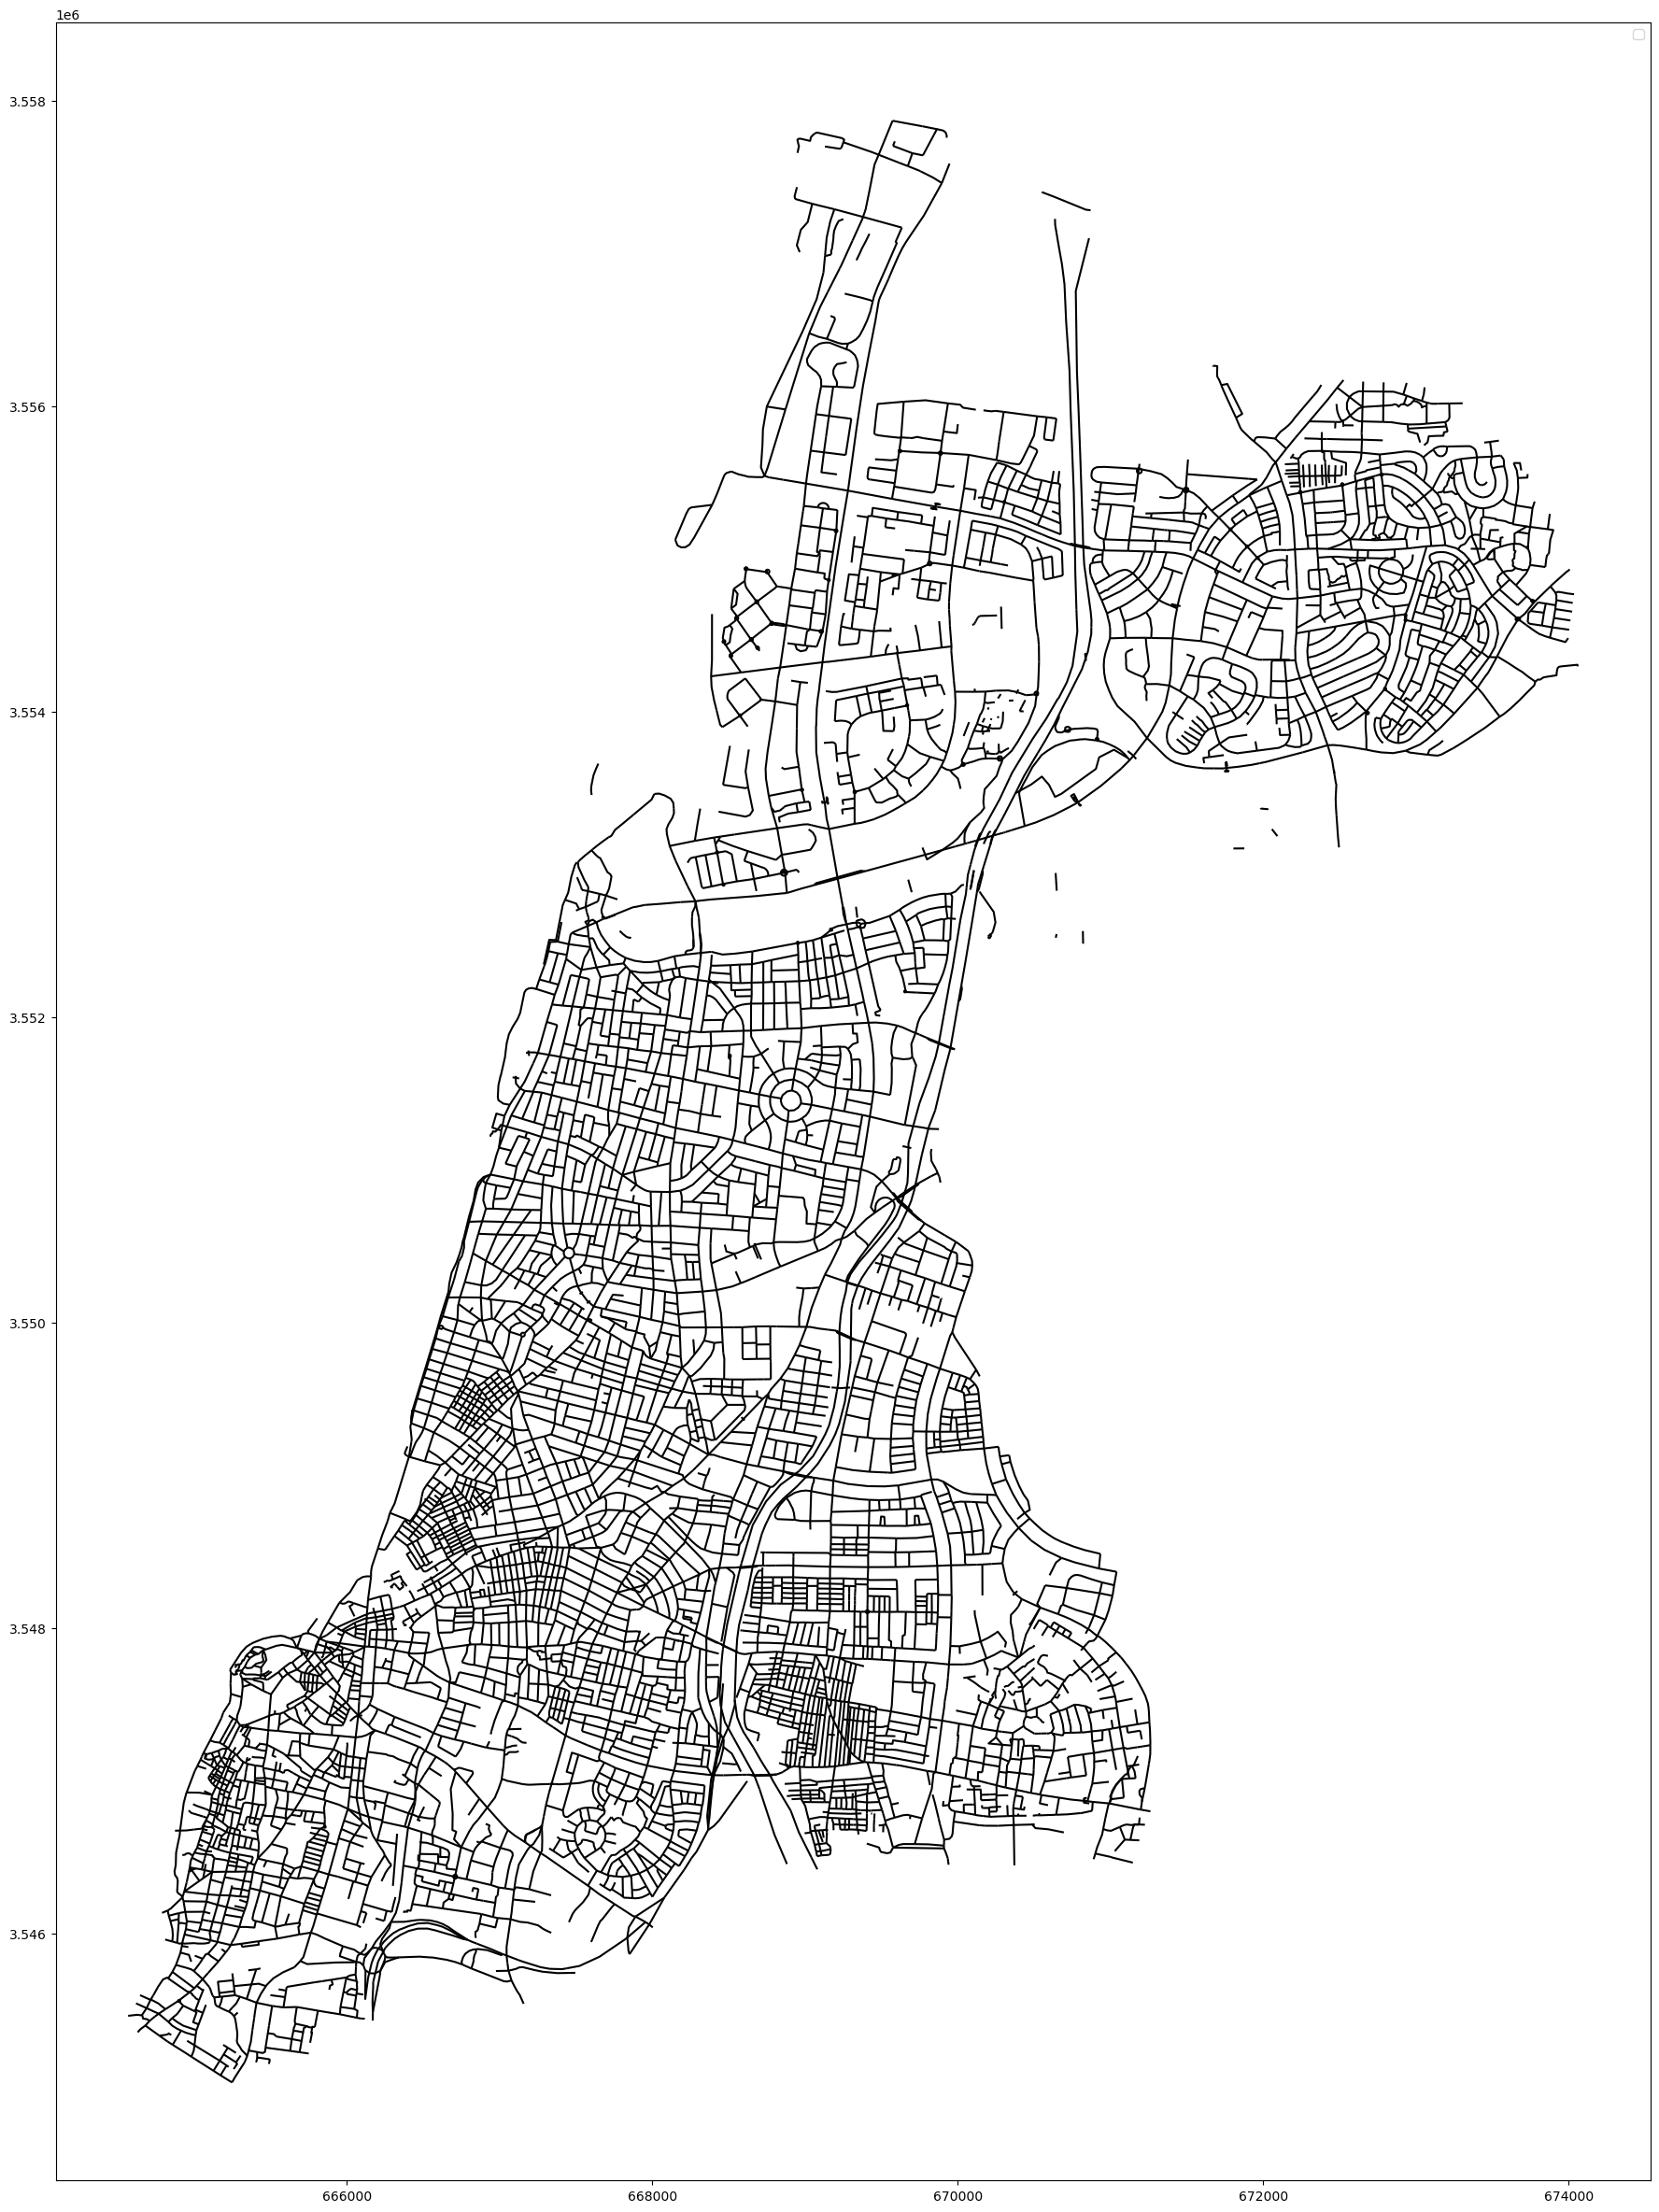

In [300]:
fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, color='black')
# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# i_m_h_ta_gdf[i_m_h_ta_gdf.location_accuracy == 3].plot(ax=ax, color='black', marker='o', markersize=15 )


plt.legend()
plt.show()

#### Plotting functions

In [301]:
import matplotlib.pyplot as plt

def plot_bar_chart(x_data, y_data, title, x_label, y_label, decimal_places=2):
    # Ensure data is in a form that can be indexed by integer
    if not isinstance(x_data, (list, tuple)):
        x_data = list(x_data)
    if not isinstance(y_data, (list, tuple)):
        y_data = list(y_data)

    x_positions = range(len(x_data))

    # Increase figure size if needed for long labels
    plt.figure(figsize=(10, 6))

    bars = plt.bar(x_positions, y_data, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add the value above each bar
    for i, bar in enumerate(bars):
        yval = round(y_data[i], decimal_places)
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            bar.get_height(), 
            str(yval),
            ha='center', 
            va='bottom'
        )

    # Rotate the x-axis labels
    plt.xticks(x_positions, x_data, rotation=45, ha='right')

    # Adjust layout so labels are not cut off
    plt.tight_layout()
    plt.show()


In [302]:
import plotly.graph_objects as go

def plot_bar_chart_heb(x_data, y_data, title, x_label, y_label, decimal_places=2):
    """
    Plots a bar chart using Plotly with optional rotation for Hebrew (or long) x-axis labels.
    
    :param x_data: List of labels or categories for the x-axis (e.g., Hebrew strings)
    :param y_data: List of numeric values for the y-axis
    :param title:  Title of the chart
    :param x_label: Label for the x-axis
    :param y_label: Label for the y-axis
    :param decimal_places: Number of decimal places to display above each bar
    """
    # Create the bar trace (each bar) with text above them showing the numeric value
    fig = go.Figure(
        data=[
            go.Bar(
                x=x_data,
                y=y_data,
                text=[f"{round(val, decimal_places)}" for val in y_data],
                textposition='auto'  # 'auto' puts the label above or inside the bar depending on space
            )
        ]
    )
    
    # Update the layout to set title, axes labels, and tilt (rotate) x-axis labels
    fig.update_layout(
        title={
            'text': title,
            'x': 0.5  # Centers the title
        },
        xaxis={
            'title': x_label,
            'tickangle': -45  # Rotates labels by -45 degrees
        },
        yaxis={'title': y_label},
        margin=dict(l=50, r=50, t=80, b=80)  # Adjust margins if needed
    )
    
    # Show the figure
    fig.show()


In [303]:
def plot_bar_chart_2(x_data, y_data1, y_data2, title, x_label, y_label, y_data1_label='data set 1', y_data2_label='data set 2', decimal_places=2):
    """
    Plot a bar chart with two bars for each x-tick.

    Parameters:
    - x_data (list or array): The data for the x-axis.
    - y_data1 (list or array): The data for the first set of bars.
    - y_data2 (list or array): The data for the second set of bars.
    - title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    - y_data1_label (str): The legend label for the first dataset.
    - y_data2_label (str): The legend label for the second dataset.
    - decimal_places (int): Decimal places to round the values shown on top of bars.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Ensure data is in a form that can be indexed by integer
    if not isinstance(x_data, (list, tuple)):
        x_data = list(x_data)
    if not isinstance(y_data1, (list, tuple)):
        y_data1 = list(y_data1)
    if not isinstance(y_data2, (list, tuple)):
        y_data2 = list(y_data2)

    plt.figure(figsize=(8, 6))
    bar_width = 0.35
    x = np.arange(len(x_data))
    
    # Plot bars with a slight offset to create a gap
    bars1 = plt.bar(x - bar_width*0.6, y_data1, bar_width, color='blue', label=y_data1_label)
    bars2 = plt.bar(x + bar_width*0.6, y_data2, bar_width, color='red', label=y_data2_label)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add the value above each bar
    for bars, y_values in [(bars1, y_data1), (bars2, y_data2)]:
        for bar, yval in zip(bars, y_values):
            yval_rounded = round(yval, decimal_places)
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     str(yval_rounded), ha='center', va='bottom')

    # Set x-ticks to match the x_data labels
    plt.xticks(x, x_data)

    plt.legend(title='Legend')
    plt.tight_layout()
    plt.show()


## Loading Crossroads and Street Segments

In [304]:
ta_crossroads = gpd.read_parquet('./csv_tables/ta_crossroads_26012025.parquet')
ta_crossroads.shape

(3526, 8)

In [305]:
ta_streets_no_cr_poly = gpd.read_parquet('./csv_tables/ta_streets_no_cr_poly_26012025.parquet')
ta_streets_no_cr_poly.shape

(6114, 26)

In [306]:
# Accidents that are 
i_m_h_ta_no_scooter_gdf = i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type == SCOOTER) & (i_m_h_ta_gdf.location_accuracy != 2) ].copy()
i_m_h_ta_no_scooter_gdf.shape

(2290, 163)

In [307]:
# # FOLDERS

# # ALL ACCIDENTS
# ALL_ACCIDENTS_CR_CNT_PATH   = './csv_tables/images_all_accidents/crossroads_count'
# ALL_ACCIDENTS_SG_CNT_PATH   = './csv_tables/images_all_accidents/streets_count'
# ALL_ACCIDENTS_SG_RATIO_PATH = './csv_tables/images_all_accidents/streets_ratio'

# # SEVER ACCIDENTS
# SEVERE_ACCIDENTS_CR_CNT_PATH   = './csv_tables/images_severe_accidents/crossroads_count'
# SEVERE_ACCIDENTS_SG_CNT_PATH   = './csv_tables/images_severe_accidents/streets_count'
# SEVERE_ACCIDENTS_SG_RATIO_PATH = './csv_tables/images_severe_accidents/streets_ratio'

# # KILLED ACCIDENTS
# KILLED_ACCIDENTS_CR_CNT_PATH   = './csv_tables/images_killed_accidents/crossroads_count'
# KILLED_ACCIDENTS_SG_CNT_PATH   = './csv_tables/images_killed_accidents/streets_count'
# KILLED_ACCIDENTS_SG_RATIO_PATH = './csv_tables/images_killed_accidents/streets_ratio'

# # MM ACCIDENTS
# MM_ACCIDENTS_CR_CNT_PATH   = './csv_tables/images_mm_accidents/crossroads_count'
# MM_ACCIDENTS_SG_CNT_PATH   = './csv_tables/images_mm_accidents/streets_count'
# MM_ACCIDENTS_SG_RATIO_PATH = './csv_tables/images_mm_accidents/streets_ratio'

# # SCOOTER ACCIDENTS
# SCOOTER_ACCIDENTS_CR_CNT_PATH   = './csv_tables/images_scooter_accidents/crossroads_count'
# SCOOTER_ACCIDENTS_SG_CNT_PATH   = './csv_tables/images_scooter_accidents/streets_count'
# SCOOTER_ACCIDENTS_SG_RATIO_PATH = './csv_tables/images_scooter_accidents/streets_ratio'

#### Helper function

In [308]:

def process_accidents_data(
    accidents_gdf: gpd.GeoDataFrame,
    ta_crossroads: gpd.GeoDataFrame,
    ta_streets_no_cr_poly: gpd.GeoDataFrame,
    buffer_accidents: float = 4.0,
):
    """
    Identifies accidents accidents that happened at crossroads and on street segments, 
    drops duplicates, and removes those accidents at crossroads from street segments.

    Parameters
    ----------
    accidents_gdf : gpd.GeoDataFrame
        The GeoDataFrame containing accidents accident data (or the accident data of choice).
    ta_crossroads : gpd.GeoDataFrame
        The GeoDataFrame containing crossroad geometries.
    ta_streets_no_cr_poly : gpd.GeoDataFrame
        The GeoDataFrame containing street segment geometries (excluding crossroads).
    buffer_accidents : float, optional
        The buffer distance applied to accident points when intersecting with crossroads. 
        Defaults to 4.0.

    Returns
    -------
    tuple
        A 4-tuple of GeoDataFrames:
        (
            ta_cr_sjoin_accidents,  # Crossroads joined with accidents 
            accidents_on_cr,     # Accidents at crossroads 
            streets_seg_sjoin_accidents,  # Street segments joined with accidents
            accidents_on_st_seg       # Accidents on street segments (excluding crossroads)
        )
    """
    
    # 1. Copy the accident GeoDataFrame so we don't alter the original
    accidents_gdf_cp = accidents_gdf.copy()
    
    # 2. Apply buffer for crossroad analysis
    accidents_gdf_cp.geometry = accidents_gdf_cp.buffer(buffer_accidents)
    
    # 3. Spatial join: Crossroads with accidents
    ta_cr_sjoin_accidents = gpd.sjoin(
        ta_crossroads, 
        accidents_gdf_cp, 
        how='inner', 
        predicate='intersects'
    )
    accidents_on_cr = gpd.sjoin(
        accidents_gdf_cp, 
        ta_crossroads, 
        how='inner', 
        predicate='intersects'
    )
    
    # Print shape before dropping duplicates
    ta_cr_sjoin_accidents = ta_cr_sjoin_accidents.drop_duplicates(subset='cr_idx')
    print('Crossroads where accidents happened:', ta_cr_sjoin_accidents.shape)
    
    accidents_on_cr = accidents_on_cr.drop_duplicates(subset='provider_and_id')
    print('Accidents on crossroads:', accidents_on_cr.shape, '\n')
    
    # 4. Spatial join: Street segments with accidents
    streets_seg_sjoin_accidents = gpd.sjoin(
        ta_streets_no_cr_poly, 
        accidents_gdf_cp, 
        how='inner', 
        predicate='intersects'
    )
    accidents_on_st_seg = gpd.sjoin(
        accidents_gdf_cp, 
        ta_streets_no_cr_poly, 
        how='inner', 
        predicate='intersects'
    )

    
    streets_seg_sjoin_accidents = streets_seg_sjoin_accidents.drop_duplicates(subset='st_seg_idx')
    print('Street segments that accidents happened:', streets_seg_sjoin_accidents.shape)
    
    accidents_on_st_seg = accidents_on_st_seg.drop_duplicates(subset='provider_and_id')
    
    # 6. Remove accidents that already appear in crossroads from the street-segments layer
    accidents_on_st_seg = accidents_on_st_seg[
        ~accidents_on_st_seg.provider_and_id.isin(accidents_on_cr.provider_and_id)
    ]

    accidents_no_cr_or_seg = accidents_gdf_cp[(~accidents_gdf_cp.provider_and_id.isin(accidents_on_cr.provider_and_id)) & 
                        (~accidents_gdf_cp.provider_and_id.isin(accidents_on_st_seg.provider_and_id))]
    
    print('Accidents on street segments (excluding crossroads):', accidents_on_st_seg.shape,'\n')

    print('Accidents that are not on streets or crossroads:', accidents_no_cr_or_seg.shape)
    
    # Return the relevant GeoDataFrames
    return (
        ta_cr_sjoin_accidents,   # Crossroads joined with accidents
        accidents_on_cr,      # Accidents at crossroads
        streets_seg_sjoin_accidents,  # Street segments joined with accidents
        accidents_on_st_seg,   # Accidents on street segments (excluding crossroads)
        accidents_no_cr_or_seg # Accidents that are not on streets or crossroads
    )


In [309]:
import plotly.graph_objs as go

def plot_separate_lines_by_sorted_count(
    df,
    top_10_by_cnt,
    x_col='accident_year',
    y_col='acc_count',
    group_col='cr_idx',
    label_col='cr_name',
    title_prefix="Crossroad Plot: ",
    width=1000,
    height=600
):
    """
    Creates one Plotly line chart per crossroad, iterating in the order given by
    top_10_by_cnt.index (already sorted by accident count).

    Parameters
    ----------
    df : pd.DataFrame
        A preprocessed DataFrame containing (at least) the columns for x_col, y_col, group_col, and label_col.
        Example columns: ['accident_year', 'acc_count', 'cr_idx', 'cr_name'].
    top_10_by_cnt : pd.DataFrame or pd.Series
        A DataFrame or Series where the index is 'cr_idx', sorted by some criterion (e.g., descending count).
        We will iterate over this index in order to plot each crossroad's figure.
    x_col : str, default 'accident_year'
        The column used on the x-axis.
    y_col : str, default 'acc_count'
        The column used on the y-axis.
    group_col : str, default 'cr_idx'
        The column identifying different crossroads (groups).
    label_col : str, default 'cr_name'
        The column for labeling each group in the figure title.
    title_prefix : str, default "Crossroad Plot: "
        A prefix for each figure's title, e.g., "Crossroad Plot: King & Main".
    width : int, default 1000
        Figure width in pixels.
    height : int, default 600
        Figure height in pixels.

    Returns
    -------
    dict
        A dictionary where each key is a crossroad id (from top_10_by_cnt.index),
        and each value is a Plotly Figure object.

    Example
    -------
    # Suppose df_yearly_counts is your DataFrame with columns: 'accident_year', 'cr_idx', 'acc_count'
    # and you've merged in 'cr_name'. Also suppose top_10_by_cnt has cr_idx as its index.
    
    figures_dict = plot_separate_lines_by_sorted_count(
        df=df_yearly_counts,
        top_10_by_cnt=top_10_by_cnt,
        x_col='accident_year',
        y_col='acc_count',
        group_col='cr_idx',
        label_col='cr_name',
        title_prefix="Accidents for Crossroad: "
    )
    
    # Show each figure
    for cr_idx_val, fig in figures_dict.items():
        fig.show()
    """

    # A dictionary to store figures keyed by crossroad (cr_idx)
    figures = {}

    # The crossroads in the order of their sorted counts
    sorted_groups = top_10_by_cnt.index

    for grp_val in sorted_groups:
        # Subset df to just this crossroad, then sort by x_col
        grp_df = df[df[group_col] == grp_val].sort_values(by=x_col)
        
        if grp_df.empty:
            # It's possible that top_10_by_cnt includes a cr_idx
            # that doesn't appear in df (rare, but can happen). Skip if empty.
            continue
        
        # Retrieve a label for the figure title (e.g., "Main & King")
        label_series = grp_df[label_col].dropna()
        if not label_series.empty:
            label_for_title = label_series.iloc[0]
        else:
            label_for_title = str(grp_val)

        # Create a new figure for this crossroad
        fig = go.Figure()

        # Add a single line trace
        fig.add_trace(
            go.Scatter(
                x=grp_df[x_col],
                y=grp_df[y_col],
                mode='lines+markers',
                name=label_for_title
            )
        )

        # Customize layout
        fig.update_layout(
            title=f"{title_prefix}{label_for_title}",
            xaxis_title=x_col,
            yaxis_title=y_col,
            width=width,
            height=height
        )

        # Store the figure under the crossroad's ID
        figures[grp_val] = fig

    return figures


In [310]:
def plot_accidents_on_map(
    crossroads_joined_accidents: gpd.GeoDataFrame,
    accidents_on_crossroads: gpd.GeoDataFrame,
    streets_joined_accidents: gpd.GeoDataFrame,
    accidents_on_streets: gpd.GeoDataFrame,
    accidents_elsewhere: gpd.GeoDataFrame,
    center: tuple = (32.047, 34.785),
    zoom: int = 11
) -> leafmap.Map:
    """
    Plots different categories of accidents on a Leafmap map.

    Parameters
    ----------
    crossroads_joined_accidents : gpd.GeoDataFrame
        GeoDataFrame representing crossroads features joined with accidents.
        Example: the result of a spatial join between crossroads polygons 
        and accident points.
    accidents_on_crossroads : gpd.GeoDataFrame
        GeoDataFrame representing the actual accident points located on crossroads.
    streets_joined_accidents : gpd.GeoDataFrame
        GeoDataFrame representing street-segment features joined with accidents.
        Example: the result of a spatial join between street segment polygons 
        and accident points.
    accidents_on_streets : gpd.GeoDataFrame
        GeoDataFrame representing the actual accident points located on street segments.
    accidents_elsewhere : gpd.GeoDataFrame
        GeoDataFrame representing accident points not on crossroads or street segments.
    center : tuple, optional
        Tuple of latitude and longitude to define the map center. 
        Defaults to (32.047, 34.785).
    zoom : int, optional
        Initial zoom level of the map. Defaults to 11.

    Returns
    -------
    leafmap.Map
        A Leafmap map object with the provided GeoDataFrames overlaid.
    """

    # Create the Leafmap
    m = leafmap.Map(center=center, zoom=zoom)
    
    # Crossroads and accidents on crossroads
    m.add_gdf(
        crossroads_joined_accidents,
        style={
            "color": "green",
            "weight": 3,
            "opacity": 0.7,
            "fillColor": "green",
            "fillOpacity": 0.3,
        },
    )
    m.add_gdf(
        accidents_on_crossroads,
        style={
            "color": "green",
            "weight": 3,
            "opacity": 1,
            "fillColor": "green",
            "fillOpacity": 0.3,
        },
    )

    # Street segments and accidents on street segments
    m.add_gdf(
        streets_joined_accidents,
        style={
            "color": "blue",
            "weight": 3,
            "opacity": 0.7,
            "fillColor": "blue",
            "fillOpacity": 0.3,
        },
    )
    m.add_gdf(
        accidents_on_streets,
        style={
            "color": "blue",
            "weight": 3,
            "opacity": 1,
            "fillColor": "blue",
            "fillOpacity": 0.3,
        },
    )

    # Accidents not on crossroads or street segments
    m.add_gdf(
        accidents_elsewhere,
        style={
            "color": "red",
            "weight": 3,
            "opacity": 0.7,
            "fillColor": "red",
            "fillOpacity": 0.3,
        },
    )

    return m


In [311]:
import os
import time
import pyautogui
import geopandas as gpd

def recenter_and_screenshot(
    m,
    gdf,
    crs="EPSG:32636",
    zoom=12,
    screenshot_prefix="screenshot_",
    output_dir="."
):
    """
    Iterates over the centroids of a GeoDataFrame, recenters the map on each centroid,
    waits, and takes a screenshot.

    Parameters
    ----------
    m : leafmap.Map
        The leafmap map instance that has already been displayed.
    gdf : GeoDataFrame
        A GeoDataFrame containing polygons (or any geometry). Assumes it is in `crs` (default EPSG:32636).
    crs : str, optional
        The current CRS of `gdf`. Default is "EPSG:32636".
    zoom : int, optional
        Zoom level to use when recentering. Default is 12.
    screenshot_prefix : str, optional
        Filename prefix for the screenshots. Default is "screenshot_".
    output_dir : str, optional
        Directory where screenshots will be saved. Default is the current directory (".").

    Returns
    -------
    None
    """

    # 1) Compute centroid in the given CRS (default EPSG:32636)
    centroids_utm = gdf.geometry.centroid

    # 2) Build a GeoDataFrame from those centroids to reproject to EPSG:4326
    centroids_gdf = gpd.GeoDataFrame(geometry=centroids_utm, crs=crs)
    centroids_wgs84 = centroids_gdf.to_crs("EPSG:4326")

    # Make sure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # 3) Iterate over the centroids
    for i, point in enumerate(centroids_wgs84.geometry):
        lon, lat = point.x, point.y

        # Recenter the map
        m.set_center(lat=lat, lon=lon, zoom=zoom)

        # Wait 3 seconds to allow the map to render
        time.sleep(3)

        # Capture a screenshot of the *entire screen* or a specified region
        screenshot = pyautogui.screenshot(region=(450, 270, 2000, 1050))
        
        # Build the full path to save the screenshot
        filename = f"{screenshot_prefix}{i}.png"
        filepath = os.path.join(output_dir, filename)
        
        # Save the screenshot
        screenshot.save(filepath)

        # Wait 2 more seconds before moving to the next centroid
        time.sleep(2)


In [312]:
def df_and_images_to_pdf_hebrew(
    df, 
    images_folder, 
    columns=None, 
    output_pdf="output.pdf"
):
    """
    Creates a PDF where:
      (1) A "0_table.png" is created from the given DataFrame (styled, right-aligned).
          This image is placed on the first page.
      (2) Then, for each row in the DataFrame, a new page is created with:
          - The row's text (in Hebrew-friendly, RTL formatting)
          - The next image in the folder, sorted alphabetically.
      
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data to display as text.

    images_folder : str
        The path to the folder that contains PNG images. Images are sorted alphabetically.

    columns : list of str, optional
        The columns of the DataFrame to show. If None or empty, uses all columns of `df`.

    output_pdf : str, optional
        The path (including filename) where the PDF will be saved. Defaults to 'output.pdf'.
    """

    # Make sure the images folder exists
    if not os.path.exists(images_folder):
        raise FileNotFoundError(f"Images folder not found: {images_folder}")

    # If columns is None or empty, use all columns
    if not columns:
        columns = df.columns
    df = df[columns]

    # ----------------------------------------------------------------------
    # STEP 1: Create a styled image of the DataFrame (named "0_table.png")
    # ----------------------------------------------------------------------
    styled_df = df.style.set_properties(
        **{
            'text-align': 'right',  # Right-align text
            'font-family': 'Arial'
        }
    )
    table_image_path = os.path.join(images_folder, "0_table.png")
    dfi.export(styled_df, table_image_path)

    # ----------------------------------------------------------------------
    # STEP 2: Gather all PNG images (including the newly created one)
    # ----------------------------------------------------------------------
    image_paths = sorted(glob.glob(os.path.join(images_folder, "*.png")))
    if not image_paths:
        raise ValueError(f"No .png files found in folder: {images_folder}")

    # ----------------------------------------------------------------------
    # STEP 3: Initialize the PDF
    # ----------------------------------------------------------------------
    pdf = FPDF(format='A4')
    pdf.set_auto_page_break(auto=True, margin=15)

    # Add TrueType font that supports Hebrew (adjust path if needed)
    pdf.add_font('Arial', '', 'c:/windows/fonts/arial.ttf', uni=True)
    pdf.set_font("Arial", size=13)

    # ----------------------------------------------------------------------
    # PAGE 1: The "0_table.png" (DataFrame) is the first page
    # ----------------------------------------------------------------------
    pdf.add_page()
    pdf.image(image_paths[0], w=150)  # Adjust width as needed

    # ----------------------------------------------------------------------
    # PAGES 2+: For each row in df, show row text (RTL) + the next image
    # ----------------------------------------------------------------------
    # We pair up each row with image_paths[1:], i.e. skipping the first image
    for (index, row), img_path in zip(df.iterrows(), image_paths[1:]):
        pdf.add_page()

        # Convert row to string WITHOUT index
        row_str = row.to_string(index=False)

        # Apply BiDi reordering for Hebrew text
        rtl_row_str = get_display(row_str)

        # Write the text (right-aligned)
        pdf.multi_cell(w=0, h=10, txt=rtl_row_str, align='R')
        pdf.ln(5)

        # Insert the corresponding image
        pdf.image(img_path, w=200)  # Adjust width if desired

    # ----------------------------------------------------------------------
    # STEP 4: Save the PDF
    # ----------------------------------------------------------------------
    pdf.output(output_pdf)
    print(f"PDF created: {output_pdf}")


In [313]:
# ## checking created polygons

# m = leafmap.Map(center=(32.047, 34.785), zoom=11)


# m.add_gdf(df_tri_cp_explode[(df_tri_cp_explode.cr_share < 1.15) & (df_tri_cp_explode.cr_share >= 1.05)])

# m

Creating some data for Mali

In [314]:
# i_m_h_ta_mm_gdf[i_m_h_ta_mm_gdf.road_type.isin([1,2])].groupby(['accident_year','road_type']).size().to_csv('mm_accident_by_road_type_count_for_each_year.csv')

In [315]:
# i_m_h_ta_gdf[i_m_h_ta_gdf.road_type.isin([1,2])].groupby(['accident_year','road_type']).size().to_csv('accident_by_road_type_count_for_each_year.csv')

In [316]:
# i_m_h_ta_mm_gdf[i_m_h_ta_mm_gdf.road_type.isin([1,2])].drop_duplicates(subset=['provider_and_id']).groupby(['accident_year','road_type']).size().to_csv('uq_p_and_id_mm_accident_by_road_type_count_for_each_year.csv')

In [317]:
# i_m_h_ta_gdf[i_m_h_ta_gdf.road_type.isin([1,2])].drop_duplicates(subset=['provider_and_id']).groupby(['accident_year','road_type']).size().to_csv('uq_p_and_id_accident_by_road_type_count_for_each_year.csv')

Create a table that as index has year.

Each year (row) will have the fallowing:
1. number of accidents
2. number of severe, light, and fatal
3. length of streets
4. length of BP

In [318]:
year_bp_len_cumsum = bp_ta_bp_and_meta.groupby('bitzua').msorech.sum()
year_bp_len_cumsum

bitzua
-1         5236.20
 2000    115015.55
 2002     51288.16
 2004     41256.26
 2010       225.92
 2011     14458.88
 2012     17737.29
 2013     58331.54
 2014     19154.82
 2015      5625.08
 2016      6509.02
 2017      5767.46
 2018      9944.76
 2019     30267.56
 2020     33107.77
 2021     79084.48
 2022     33223.71
 2023     19417.12
 2024      2693.64
Name: msorech, dtype: float64

In [319]:
bp_ta_bp_and_meta.msorech.sum()

548345.22

Creating street length for each quarter

In [320]:
osm_ta_streets = gpd.read_parquet('./csv_tables/os_ta_streets_edges.parquet')

osm_ta_streets['length'] = osm_ta_streets.length
q_sjoin_streets = gpd.sjoin(ta_q, osm_ta_streets, how='inner', predicate='intersects')
q_sjoin_streets = q_sjoin_streets.drop_duplicates(subset='os_ta_index')
q_st_len_sum = q_sjoin_streets.groupby('krova')['length'].sum()
q_st_len_by_year = pd.DataFrame(index=range(2013, 2025))
for i in range(1, 10):
    q_st_len_by_year[i] = q_st_len_sum[i]
q_st_len_by_year.columns = ['st_len_k1','st_len_k2','st_len_k3','st_len_k4','st_len_k5','st_len_k6','st_len_k7','st_len_k8','st_len_k9']
q_st_len_by_year

,st_len_k1,st_len_k2,st_len_k3,st_len_k4,st_len_k5,st_len_k6,st_len_k7,st_len_k8,st_len_k9
2013,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2014,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2015,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2016,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2017,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2018,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2019,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2020,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2021,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222
2022,126992.651172,104452.057624,69130.106544,73949.468031,59410.736745,49315.893121,108333.949744,75063.084654,131653.037222


Creating bp cumulated length for each quarter

In [321]:
bp_ta_bp_and_meta = bp_ta_bp_and_meta[(bp_ta_bp_and_meta.bitzua != -1)]
q_sjoin_bp = gpd.sjoin(ta_q, bp_ta_bp_and_meta, how='inner', predicate='intersects')
q_sjoin_bp = q_sjoin_bp.drop_duplicates('index_right')
q_sjoin_bp = pd.DataFrame(q_sjoin_bp.groupby(['krova','bitzua']).msorech.sum())
q_sjoin_bp_cumsum = q_sjoin_bp.groupby('krova').msorech.cumsum()
q_sjoin_bp['msorech'] = q_sjoin_bp_cumsum

df_unstacked = q_sjoin_bp.unstack(level='krova')
df_unstacked = df_unstacked.fillna(method='ffill').reset_index()
bp_len_cum_sum_by_krova = pd.DataFrame( index=df_unstacked['bitzua'].values, data=df_unstacked.iloc[:,1:].values)
    
bp_len_cum_sum_by_krova.columns = ['bp_len_k1','bp_len_k2','bp_len_k3','bp_len_k4','bp_len_k5','bp_len_k6','bp_len_k7','bp_len_k8','bp_len_k9']
bp_len_cum_sum_by_krova
# df_unstacked


,bp_len_k1,bp_len_k2,bp_len_k3,bp_len_k4,bp_len_k5,bp_len_k6,bp_len_k7,bp_len_k8,bp_len_k9
2000,2108.60,69533.05,6983.34,11995.06,3590.94,737.65,2623.07,15367.03,2076.81
2002,2108.60,69533.05,37289.98,30645.30,3590.94,3068.93,2623.07,15367.03,2076.81
2004,21892.15,72182.97,42186.37,34395.31,3590.94,4199.77,2623.07,15489.19,11000.20
2010,21892.15,72182.97,42186.37,34395.31,3750.05,4199.77,2623.07,15556.00,11000.20
2011,32260.71,72182.97,42186.37,34395.31,3750.05,4199.77,2623.07,15556.00,15090.52
2012,36307.54,72182.97,46715.31,36735.03,5537.93,4447.66,6945.46,16019.64,15090.52
2013,46915.27,72687.00,46715.31,37237.94,7252.29,4764.27,7931.57,16019.64,58790.31
2014,47842.40,72955.35,46715.31,37855.96,7624.37,5400.01,9054.90,18665.45,71354.67
2015,50977.25,72955.35,46715.31,37855.96,7794.05,5501.84,10478.98,19222.39,71592.37
2016,51476.17,72955.35,46715.31,41919.26,7794.05,5740.20,10791.71,20000.27,72210.20


In [322]:
i_m_h_ta_gdf.location_accuracy.value_counts(dropna=False)

location_accuracy
1    59306
3    48641
Name: count, dtype: int64

In [323]:
i_m_h_ta_mm_gdf.drop_duplicates(subset='provider_and_id')[(i_m_h_ta_mm_gdf.accident_year == 2022)].count()

accident_id              877
provider_and_id          877
provider_code            877
file_type_police         877
involved_type            877
                        ... 
vehicle_damage_hebrew    877
urban_intersection       245
house_number             631
accident_date            877
geometry                 877
Length: 163, dtype: int64

In [324]:
i_m_h_ta_mm_gdf.columns[i_m_h_ta_mm_gdf.columns.str.contains('file')]

Index(['file_type_police'], dtype='object')

In [325]:
i_m_h_ta_gdf.drop_duplicates(subset='provider_and_id')[(i_m_h_ta_gdf.provider_code == 1) & (i_m_h_ta_gdf.accident_year == 2022)].count()

accident_id              1102
provider_and_id          1102
provider_code            1102
file_type_police         1102
involved_type            1102
                         ... 
vehicle_damage_hebrew     964
urban_intersection        588
house_number              511
accident_date            1102
geometry                 1102
Length: 163, dtype: int64

### Creating CSV for accidents

* All accidents
* Micro mobility accidents
* Scooter accidents

In [337]:
import geopandas as gpd
import pandas as pd

def generate_accident_stats(ta_q, accidents_df):
    """
    Given two GeoDataFrames, 'ta_q' and 'accidents_df', performs
    spatial joins filtered by accident severity (if relevant)
    and returns 4 pivoted DataFrames (all columns as int16):
      1) Total
      2) Light
      3) Severe
      4) Killed
    """

    # ---------------------------------------
    #  TOTAL ACCIDENTS
    # ---------------------------------------
    q_sjoin_accidents = gpd.sjoin(
        ta_q,
        accidents_df,
        how='inner',
        predicate='intersects'
    )
    q_sjoin_accidents.drop_duplicates(subset=['index_right'], inplace=True)

    acc = (
        q_sjoin_accidents
        .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
        .count()
        .reset_index()
    )

    accident_by_year_for_q = acc.pivot(
        index='accident_year',
        columns=['krova', 'provider_code'],
        values='index_right'
    ).fillna(0)

    accident_by_year_for_q.columns = [
        f"total_acc_k{k}_p{p}"
        for k, p in accident_by_year_for_q.columns
    ]

    # Reindex + convert columns to int16
    accident_by_year_for_q = (
        accident_by_year_for_q
        .reindex(range(2013, 2025), fill_value=0)
        .astype("int16")
    )

    # ---------------------------------------
    #  LIGHT ACCIDENTS (accident_severity == 3)
    # ---------------------------------------
    q_sjoin_accidents_light = gpd.sjoin(
        ta_q,
        accidents_df[accidents_df.accident_severity == 3],
        how='inner',
        predicate='intersects'
    )
    q_sjoin_accidents_light.drop_duplicates(subset=['index_right'], inplace=True)

    acc_light = (
        q_sjoin_accidents_light
        .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
        .count()
        .reset_index()
    )

    light_accident_by_year_for_q = acc_light.pivot(
        index='accident_year',
        columns=['krova', 'provider_code'],
        values='index_right'
    ).fillna(0)

    light_accident_by_year_for_q.columns = [
        f"light_acc_k{k}_p{p}"
        for k, p in light_accident_by_year_for_q.columns
    ]

    light_accident_by_year_for_q = (
        light_accident_by_year_for_q
        .reindex(range(2013, 2025), fill_value=0)
        .astype("int16")
    )

    # ---------------------------------------
    #  SEVERE ACCIDENTS (accident_severity == 2)
    # ---------------------------------------
    q_sjoin_accidents_severe = gpd.sjoin(
        ta_q,
        accidents_df[accidents_df.accident_severity == 2],
        how='inner',
        predicate='intersects'
    )
    q_sjoin_accidents_severe.drop_duplicates(subset=['index_right'], inplace=True)

    acc_severe = (
        q_sjoin_accidents_severe
        .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
        .count()
        .reset_index()
    )

    severe_accident_by_year_for_q = acc_severe.pivot(
        index='accident_year',
        columns=['krova', 'provider_code'],
        values='index_right'
    ).fillna(0)

    severe_accident_by_year_for_q.columns = [
        f"severe_acc_k{k}_p{p}"
        for k, p in severe_accident_by_year_for_q.columns
    ]

    severe_accident_by_year_for_q = (
        severe_accident_by_year_for_q
        .reindex(range(2013, 2025), fill_value=0)
        .astype("int16")
    )

    # ---------------------------------------
    #  KILLED ACCIDENTS (accident_severity == 1)
    # ---------------------------------------
    q_sjoin_accidents_killed = gpd.sjoin(
        ta_q,
        accidents_df[accidents_df.accident_severity == 1],
        how='inner',
        predicate='intersects'
    )
    q_sjoin_accidents_killed.drop_duplicates(subset=['index_right'], inplace=True)

    acc_killed = (
        q_sjoin_accidents_killed
        .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
        .count()
        .reset_index()
    )

    killed_accident_by_year_for_q = acc_killed.pivot(
        index='accident_year',
        columns=['krova', 'provider_code'],
        values='index_right'
    ).fillna(0)

    killed_accident_by_year_for_q.columns = [
        f"killed_acc_k{k}_p{p}"
        for k, p in killed_accident_by_year_for_q.columns
    ]

    killed_accident_by_year_for_q = (
        killed_accident_by_year_for_q
        .reindex(range(2013, 2025), fill_value=0)
        .astype("int16")
    )

    # Return all four final pivoted DataFrames
    return (
        accident_by_year_for_q,      # total 
        light_accident_by_year_for_q,
        severe_accident_by_year_for_q,
        killed_accident_by_year_for_q
    )


In [338]:
# total accidents
i_m_h_ta_gdf_no_dup_p_and_id = i_m_h_ta_gdf.drop_duplicates(subset=['provider_and_id'])
total_accidents, light_accidents, severe_accidents, killed_accidents = generate_accident_stats(ta_q, i_m_h_ta_gdf_no_dup_p_and_id)

# mm accidents
i_m_h_ta_mm_gdf_no_dup_p_and_id = i_m_h_ta_mm_gdf.drop_duplicates(subset=['provider_and_id'])
mm_accidents, mm_light_accidents, mm_severe_accidents, mm_killed_accidents = generate_accident_stats(ta_q, i_m_h_ta_mm_gdf_no_dup_p_and_id)

# scooter accidents
i_m_h_ta_no_scooter_gdf_no_dup_p_and_id = i_m_h_ta_no_scooter_gdf.drop_duplicates(subset=['provider_and_id'])
scooter_accidents, scooter_light_accidents, scooter_severe_accidents, scooter_killed_accidents = generate_accident_stats(ta_q, i_m_h_ta_no_scooter_gdf_no_dup_p_and_id)

# -----

# total injured
i_m_h_ta_gdf_no_dup_p_and_id = i_m_h_ta_gdf
total_injured, light_injured, severe_injured, killed_injured = generate_accident_stats(ta_q, i_m_h_ta_gdf)

# mm injured
i_m_h_ta_mm_gdf_no_dup_p_and_id = i_m_h_ta_mm_gdf
mm_injured, mm_light_injured, mm_severe_injured, mm_killed_injured = generate_accident_stats(ta_q, i_m_h_ta_mm_gdf)

# scooter injured
scooter_injured, scooter_light_injured, scooter_severe_injured, scooter_killed_injured = generate_accident_stats(ta_q, i_m_h_ta_no_scooter_gdf)

Combining the tuple data frames to a single one:

In [344]:
def combine_data_frames(year_index, *data_frames):
    """
    Combine all columns from the given data_frames into a single DataFrame
    with year_index as the index.
    """
    base_res = pd.DataFrame(index=year_index)
    for df in data_frames:
        # Merge each column of df into base_res
        for col in df.columns:
            base_res[col] = df[col]
    return base_res


In [345]:
# Combine total accidents (range 2013–2024 or 2013–2025; adjust as needed)
combined_total_accidents = combine_data_frames(
    range(2013, 2025),
    total_accidents,
    light_accidents,
    severe_accidents,
    killed_accidents
)

# Combine mm accidents
combined_mm_accidents = combine_data_frames(
    range(2013, 2025),
    mm_accidents,
    mm_light_accidents,
    mm_severe_accidents,
    mm_killed_accidents
)

# Combine scooter accidents
combined_scooter_accidents = combine_data_frames(
    range(2013, 2025),
    scooter_accidents,
    scooter_light_accidents,
    scooter_severe_accidents,
    scooter_killed_accidents
)

# Combine total injured
combined_total_injured = combine_data_frames(
    range(2013, 2025),
    total_injured,
    light_injured,
    severe_injured,
    killed_injured
)

# Combine mm injured
combined_mm_injured = combine_data_frames(
    range(2013, 2025),
    mm_injured,
    mm_light_injured,
    mm_severe_injured,
    mm_killed_injured
)

# Combine scooter injured
combined_scooter_injured = combine_data_frames(
    range(2013, 2025),
    scooter_injured,
    scooter_light_injured,
    scooter_severe_injured,
    scooter_killed_injured
)


In [347]:
combined_total_accidents.to_csv('./csv_tables/for_mali/combined_total_accidents.csv')
combined_mm_accidents.to_csv('./csv_tables/for_mali/combined_mm_accidents.csv')
combined_scooter_accidents.to_csv('./csv_tables/for_mali/combined_scooter_accidents.csv')

# -----

combined_total_injured.to_csv('./csv_tables/for_mali/combined_total_injured.csv')
combined_mm_injured.to_csv('./csv_tables/for_mali/combined_mm_injured.csv')
combined_scooter_injured.to_csv('./csv_tables/for_mali/combined_scooter_injured.csv')

In [343]:
# ---------------------------------------
#  TOTAL ACCIDENTS
# ---------------------------------------
# 1. Perform spatial join
q_sjoin_accidents = gpd.sjoin(
    ta_q, 
    i_m_h_ta_gdf_no_dup_p_and_id, 
    how='inner', 
    predicate='intersects'
)

# 2. Drop duplicates
q_sjoin_accidents.drop_duplicates(subset=['index_right'], inplace=True)

# 3. Group by krova, accident_year, provider_code
acc = (
    q_sjoin_accidents
    .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
    .count()
    .reset_index()
)

# 4. Pivot so that accident_year is the index and (krova, provider_code) form the columns
accident_by_year_for_q = acc.pivot(
    index='accident_year',
    columns=['krova', 'provider_code'],
    values='index_right'
).fillna(0)

# 5. Rename columns from (krova=k, provider_code=p) to "total_acc_k{k}_p{p}"
accident_by_year_for_q.columns = [
    f"total_acc_k{k}_p{p}" 
    for k, p in accident_by_year_for_q.columns
]

# 6. Reindex to ensure we have rows for all years 2013–2024/2025
accident_by_year_for_q = accident_by_year_for_q.reindex(
    range(2013, 2025), 
    fill_value=0
)

# Show final
accident_by_year_for_q


# ---------------------------------------
#  LIGHT ACCIDENTS (accident_severity == 3)
# ---------------------------------------
# 1. Perform spatial join (filter accident_severity == 3)
q_sjoin_accidents_light = gpd.sjoin(
    ta_q,
    i_m_h_ta_gdf_no_dup_p_and_id[
        i_m_h_ta_gdf_no_dup_p_and_id.accident_severity == 3
    ],
    how='inner',
    predicate='intersects'
)

# 2. Drop duplicates
q_sjoin_accidents_light.drop_duplicates(subset=['index_right'], inplace=True)

# 3. Group by krova, accident_year, provider_code
acc_light = (
    q_sjoin_accidents_light
    .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
    .count()
    .reset_index()
)

# 4. Pivot
light_accident_by_year_for_q = acc_light.pivot(
    index='accident_year',
    columns=['krova', 'provider_code'],
    values='index_right'
).fillna(0)

# 5. Rename columns
light_accident_by_year_for_q.columns = [
    f"light_acc_k{k}_p{p}" 
    for k, p in light_accident_by_year_for_q.columns
]

# 6. Reindex (2013–2024/2025)
light_accident_by_year_for_q = light_accident_by_year_for_q.reindex(
    range(2013, 2025),
    fill_value=0
)

# Show final
light_accident_by_year_for_q


# ---------------------------------------
#  SEVERE ACCIDENTS (accident_severity == 2)
# ---------------------------------------
# 1. Perform spatial join (filter accident_severity == 2)
q_sjoin_accidents_severe = gpd.sjoin(
    ta_q,
    i_m_h_ta_gdf_no_dup_p_and_id[
        i_m_h_ta_gdf_no_dup_p_and_id.accident_severity == 2
    ],
    how='inner',
    predicate='intersects'
)

# 2. Drop duplicates
q_sjoin_accidents_severe.drop_duplicates(subset=['index_right'], inplace=True)

# 3. Group by krova, accident_year, provider_code
acc_severe = (
    q_sjoin_accidents_severe
    .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
    .count()
    .reset_index()
)

# 4. Pivot
severe_accident_by_year_for_q = acc_severe.pivot(
    index='accident_year',
    columns=['krova', 'provider_code'],
    values='index_right'
).fillna(0)

# 5. Rename columns
severe_accident_by_year_for_q.columns = [
    f"severe_acc_k{k}_p{p}" 
    for k, p in severe_accident_by_year_for_q.columns
]

# 6. Reindex (2013–2024/2025)
severe_accident_by_year_for_q = severe_accident_by_year_for_q.reindex(
    range(2013, 2025),
    fill_value=0
)

# Show final
severe_accident_by_year_for_q


# ---------------------------------------
#  KILLED ACCIDENTS (accident_severity == 1)
# ---------------------------------------
# 1. Perform spatial join (filter accident_severity == 1)
q_sjoin_accidents_killed = gpd.sjoin(
    ta_q,
    i_m_h_ta_gdf_no_dup_p_and_id[
        i_m_h_ta_gdf_no_dup_p_and_id.accident_severity == 1
    ],
    how='inner',
    predicate='intersects'
)

# 2. Drop duplicates
q_sjoin_accidents_killed.drop_duplicates(subset=['index_right'], inplace=True)

# 3. Group by krova, accident_year, provider_code
acc_killed = (
    q_sjoin_accidents_killed
    .groupby(['krova', 'accident_year', 'provider_code'])['index_right']
    .count()
    .reset_index()
)

# 4. Pivot
killed_accident_by_year_for_q = acc_killed.pivot(
    index='accident_year',
    columns=['krova', 'provider_code'],
    values='index_right'
).fillna(0)

# 5. Rename columns
killed_accident_by_year_for_q.columns = [
    f"killed_acc_k{k}_p{p}"
    for k, p in killed_accident_by_year_for_q.columns
]

# 6. Reindex (2013–2024/2025)
killed_accident_by_year_for_q = killed_accident_by_year_for_q.reindex(
    range(2013, 2025),
    fill_value=0
)

# Show final
killed_accident_by_year_for_q


,killed_acc_k1_p1,killed_acc_k2_p1,killed_acc_k3_p1,killed_acc_k4_p1,killed_acc_k5_p1,killed_acc_k6_p1,killed_acc_k7_p1,killed_acc_k8_p1,killed_acc_k9_p1
accident_year,,,,,,,,,
2013,0.0,0.0,2.0,2.0,4.0,10.0,4.0,6.0,4.0
2014,0.0,1.0,3.0,0.0,0.0,3.0,2.0,7.0,4.0
2015,0.0,9.0,3.0,2.0,2.0,0.0,4.0,0.0,4.0
2016,0.0,0.0,2.0,0.0,11.0,0.0,9.0,2.0,5.0
2017,7.0,4.0,2.0,0.0,0.0,0.0,7.0,3.0,2.0
2018,12.0,5.0,6.0,0.0,2.0,6.0,6.0,4.0,5.0
2019,2.0,3.0,4.0,4.0,2.0,0.0,9.0,7.0,6.0
2020,2.0,1.0,0.0,2.0,0.0,0.0,8.0,2.0,9.0
2021,6.0,4.0,1.0,5.0,2.0,7.0,5.0,9.0,6.0


Combining all the created data to a single dataframe

In [221]:
base_res = pd.DataFrame(index=[i for i in range(2013, 2024)])

for col in bp_len_cum_sum_by_krova.columns:
    base_res[col] = bp_len_cum_sum_by_krova[col]

for col in q_st_len_by_year.columns:
    base_res[col] = q_st_len_by_year[col]

for col in accident_by_year_for_q.columns:
    base_res[col] = accident_by_year_for_q[col]

for col in light_accident_by_year_for_q.columns:
    base_res[col] = light_accident_by_year_for_q[col]

for col in severe_accident_by_year_for_q.columns:
    base_res[col] = severe_accident_by_year_for_q[col]

for col in killed_accident_by_year_for_q.columns:
    base_res[col] = killed_accident_by_year_for_q[col]

base_res

,bp_len_k1,bp_len_k2,bp_len_k3,bp_len_k4,bp_len_k5,bp_len_k6,bp_len_k7,bp_len_k8,bp_len_k9,st_len_k1,...,severe_acc_k9_p1,killed_acc_k1_p1,killed_acc_k2_p1,killed_acc_k3_p1,killed_acc_k4_p1,killed_acc_k5_p1,killed_acc_k6_p1,killed_acc_k7_p1,killed_acc_k8_p1,killed_acc_k9_p1
2013,46915.27,72687.00,46715.31,37237.94,7252.29,4764.27,7931.57,16019.64,58790.31,126992.651172,...,20,0.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0
2014,47842.40,72955.35,46715.31,37855.96,7624.37,5400.01,9054.90,18665.45,71354.67,126992.651172,...,23,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0
2015,50977.25,72955.35,46715.31,37855.96,7794.05,5501.84,10478.98,19222.39,71592.37,126992.651172,...,32,0.0,2.0,2.0,1.0,1.0,0.0,2.0,0.0,2.0
2016,51476.17,72955.35,46715.31,41919.26,7794.05,5740.20,10791.71,20000.27,72210.20,126992.651172,...,31,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,1.0
2017,56156.94,72955.35,46715.31,42222.91,7892.13,5740.20,10791.71,20347.75,72547.68,126992.651172,...,39,3.0,2.0,1.0,0.0,0.0,0.0,3.0,2.0,1.0
2018,58788.91,72955.35,46972.93,44791.10,7892.13,5740.20,13379.13,20605.11,74189.88,126992.651172,...,31,5.0,2.0,3.0,0.0,1.0,3.0,3.0,2.0,2.0
2019,58788.91,86135.55,46972.93,45242.19,8042.00,5740.20,28479.95,20605.11,75575.46,126992.651172,...,34,1.0,1.0,2.0,2.0,1.0,0.0,4.0,3.0,3.0
2020,62304.33,99939.85,49349.71,47843.23,10641.89,7186.91,29701.92,20833.94,80888.29,126992.651172,...,26,1.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,5.0
2021,72074.60,100311.73,62188.49,60219.41,22783.19,10496.13,36588.18,37951.35,84194.83,126992.651172,...,35,2.0,2.0,1.0,2.0,1.0,3.0,2.0,4.0,3.0
2022,73801.48,102752.97,63204.22,72757.26,24009.90,23202.70,37499.82,38071.37,84731.90,126992.651172,...,25,2.0,0.0,2.0,2.0,2.0,0.0,5.0,4.0,2.0


In [223]:
base_res.columns

Index(['bp_len_k1', 'bp_len_k2', 'bp_len_k3', 'bp_len_k4', 'bp_len_k5',
       'bp_len_k6', 'bp_len_k7', 'bp_len_k8', 'bp_len_k9', 'st_len_k1',
       'st_len_k2', 'st_len_k3', 'st_len_k4', 'st_len_k5', 'st_len_k6',
       'st_len_k7', 'st_len_k8', 'st_len_k9', 'total_acc_k1_p1',
       'total_acc_k1_p3', 'total_acc_k2_p1', 'total_acc_k2_p3',
       'total_acc_k3_p1', 'total_acc_k3_p3', 'total_acc_k4_p1',
       'total_acc_k4_p3', 'total_acc_k5_p1', 'total_acc_k5_p3',
       'total_acc_k6_p1', 'total_acc_k6_p3', 'total_acc_k7_p1',
       'total_acc_k7_p3', 'total_acc_k8_p1', 'total_acc_k8_p3',
       'total_acc_k9_p1', 'total_acc_k9_p3', 'light_acc_k1_p1',
       'light_acc_k1_p3', 'light_acc_k2_p1', 'light_acc_k2_p3',
       'light_acc_k3_p1', 'light_acc_k3_p3', 'light_acc_k4_p1',
       'light_acc_k4_p3', 'light_acc_k5_p1', 'light_acc_k5_p3',
       'light_acc_k6_p1', 'light_acc_k6_p3', 'light_acc_k7_p1',
       'light_acc_k7_p3', 'light_acc_k8_p1', 'light_acc_k8_p3',
       'light_a

In [224]:
base_res.to_csv('./accidents_num_for_each_quarter_and_sug_tik_by_year.csv')

### Creating injured_num_for_each_quarter_and_sug_tik_by_year.csv

In [155]:
i_m_h_ta_gdf_no_dup_p_and_id.shape

(52065, 163)

In [156]:
q_sjoin_accidents = gpd.sjoin(ta_q, i_m_h_ta_gdf_no_dup_p_and_id, how='inner', predicate='intersects')
q_sjoin_accidents.drop_duplicates(subset=['index_right'], inplace=True)
accidents_by_krova_and_year = pd.DataFrame(q_sjoin_accidents.groupby(['krova', 'accident_year']).index_right.count())
accident_by_year_for_q = pd.DataFrame(index=range(2013, 2025))
for i in range(1,10):
    accident_by_year_for_q[i] = accidents_by_krova_and_year.xs(i).values
accident_by_year_for_q.columns = ['total_acc_k1','total_acc_k2','total_acc_k3','total_acc_k4','total_acc_k5','total_acc_k6','total_acc_k7','total_acc_k8','total_acc_k9']
accident_by_year_for_q

# Light
q_sjoin_accidents = gpd.sjoin(ta_q, i_m_h_ta_gdf_no_dup_p_and_id[i_m_h_ta_gdf_no_dup_p_and_id.accident_severity == 3], how='inner', predicate='intersects')
q_sjoin_accidents.drop_duplicates(subset=['index_right'], inplace=True)
accidents_by_krova_and_year = pd.DataFrame(q_sjoin_accidents.groupby(['krova', 'accident_year']).index_right.count())
light_accident_by_year_for_q = pd.DataFrame(index=range(2013, 2025))
for i in range(1,10):
    light_accident_by_year_for_q[i] = accidents_by_krova_and_year.xs(i).values
light_accident_by_year_for_q.columns = ['light_acc_k1','light_acc_k2','light_acc_k3','light_acc_k4','light_acc_k5','light_acc_k6','light_acc_k7','light_acc_k8','light_acc_k9']
light_accident_by_year_for_q

# Severe
q_sjoin_accidents = gpd.sjoin(ta_q, i_m_h_ta_gdf_no_dup_p_and_id[i_m_h_ta_gdf_no_dup_p_and_id.accident_severity == 2], how='inner', predicate='intersects')
q_sjoin_accidents.drop_duplicates(subset=['index_right'], inplace=True)
accidents_by_krova_and_year = pd.DataFrame(q_sjoin_accidents.groupby(['krova', 'accident_year']).index_right.count())
severe_accident_by_year_for_q = pd.DataFrame(index=range(2013, 2025))
for i in range(1,10):
    severe_accident_by_year_for_q[i] = accidents_by_krova_and_year.xs(i).values
severe_accident_by_year_for_q.columns = ['severe_acc_k1','severe_acc_k2','severe_acc_k3','severe_acc_k4','severe_acc_k5','severe_acc_k6','severe_acc_k7','severe_acc_k8','severe_acc_k9']
severe_accident_by_year_for_q


# Killed
q_sjoin_accidents = gpd.sjoin(ta_q, i_m_h_ta_gdf_no_dup_p_and_id[i_m_h_ta_gdf_no_dup_p_and_id.accident_severity == 1], how='inner', predicate='intersects')
q_sjoin_accidents.drop_duplicates(subset=['index_right'], inplace=True)
accidents_by_krova_and_year = pd.DataFrame(q_sjoin_accidents.groupby(['krova', 'accident_year']).index_right.count())
accidents_by_krova_and_year
killed_accident_by_year_for_q = pd.DataFrame(index=range(2013, 2025))
for i in range(1,10):
    killed_accident_by_year_for_q[i] = accidents_by_krova_and_year.xs(i)
killed_accident_by_year_for_q.columns = ['killed_acc_k1','killed_acc_k2','killed_acc_k3','killed_acc_k4','killed_acc_k5','killed_acc_k6','killed_acc_k7','killed_acc_k8','killed_acc_k9']
killed_accident_by_year_for_q.fillna(0, inplace=True)
killed_accident_by_year_for_q



# total_acc_by_krova_and_year
#

,killed_acc_k1,killed_acc_k2,killed_acc_k3,killed_acc_k4,killed_acc_k5,killed_acc_k6,killed_acc_k7,killed_acc_k8,killed_acc_k9
2013,0.0,0.0,1.0,1.0,2.0,2.0,2,3.0,2.0
2014,0.0,1.0,1.0,0.0,0.0,1.0,1,4.0,2.0
2015,0.0,2.0,2.0,1.0,1.0,0.0,2,0.0,2.0
2016,0.0,0.0,1.0,0.0,1.0,0.0,4,1.0,1.0
2017,3.0,2.0,1.0,0.0,0.0,0.0,3,2.0,1.0
2018,5.0,2.0,3.0,0.0,1.0,3.0,3,2.0,2.0
2019,1.0,1.0,2.0,2.0,1.0,0.0,4,3.0,3.0
2020,1.0,1.0,0.0,1.0,0.0,0.0,4,1.0,5.0
2021,2.0,2.0,1.0,2.0,1.0,3.0,2,4.0,3.0
2022,2.0,0.0,2.0,2.0,2.0,0.0,5,4.0,2.0


In [157]:
accident_by_year_for_q

,total_acc_k1,total_acc_k2,total_acc_k3,total_acc_k4,total_acc_k5,total_acc_k6,total_acc_k7,total_acc_k8,total_acc_k9
2013,604,337,573,612,786,517,659,657,898
2014,505,343,510,555,626,462,684,614,885
2015,562,353,492,553,667,507,714,674,878
2016,497,332,528,537,656,483,672,618,787
2017,503,259,478,469,591,427,641,590,746
2018,407,282,422,438,550,362,582,537,631
2019,424,233,364,427,594,417,617,493,659
2020,290,197,321,335,466,321,513,479,543
2021,341,188,322,366,495,365,543,505,562
2022,356,209,304,367,494,388,538,494,570


In [158]:
num_light_accidents  = i_m_h_ta_gdf[i_m_h_ta_gdf.accident_severity == 3].groupby('accident_year').provider_and_id.count()
num_severe_accidents = i_m_h_ta_gdf[i_m_h_ta_gdf.accident_severity == 2].groupby('accident_year').provider_and_id.count()
num_killed_accidents = i_m_h_ta_gdf[i_m_h_ta_gdf.accident_severity == 1].groupby('accident_year').provider_and_id.count()

num_killed_accidents

accident_year
2013    32
2014    20
2015    24
2016    29
2017    25
2018    46
2019    40
2020    24
2021    45
2022    49
2023    30
2024    23
Name: provider_and_id, dtype: int64

In [160]:
base_res = pd.DataFrame(index=[i for i in range(2013, 2024)])
# base_res['num_killed'] = num_killed_accidents
# base_res['num_severely_injured'] = num_severe_accidents
# base_res['num_lightly_injured'] = num_light_accidents
for col in bp_len_cum_sum_by_krova.columns:
    base_res[col] = bp_len_cum_sum_by_krova[col]

for col in q_st_len_by_year.columns:
    base_res[col] = q_st_len_by_year[col]

for col in accident_by_year_for_q.columns:
    base_res[col] = accident_by_year_for_q[col]

for col in light_accident_by_year_for_q.columns:
    base_res[col] = light_accident_by_year_for_q[col]

for col in severe_accident_by_year_for_q.columns:
    base_res[col] = severe_accident_by_year_for_q[col]

for col in killed_accident_by_year_for_q.columns:
    base_res[col] = killed_accident_by_year_for_q[col]

base_res

,bp_len_k1,bp_len_k2,bp_len_k3,bp_len_k4,bp_len_k5,bp_len_k6,bp_len_k7,bp_len_k8,bp_len_k9,st_len_k1,...,severe_acc_k9,killed_acc_k1,killed_acc_k2,killed_acc_k3,killed_acc_k4,killed_acc_k5,killed_acc_k6,killed_acc_k7,killed_acc_k8,killed_acc_k9
2013,46915.27,72687.00,46715.31,37237.94,7252.29,4764.27,7931.57,16019.64,58790.31,126992.651172,...,20,0.0,0.0,1.0,1.0,2.0,2.0,2,3.0,2.0
2014,47842.40,72955.35,46715.31,37855.96,7624.37,5400.01,9054.90,18665.45,71354.67,126992.651172,...,23,0.0,1.0,1.0,0.0,0.0,1.0,1,4.0,2.0
2015,50977.25,72955.35,46715.31,37855.96,7794.05,5501.84,10478.98,19222.39,71592.37,126992.651172,...,32,0.0,2.0,2.0,1.0,1.0,0.0,2,0.0,2.0
2016,51476.17,72955.35,46715.31,41919.26,7794.05,5740.20,10791.71,20000.27,72210.20,126992.651172,...,31,0.0,0.0,1.0,0.0,1.0,0.0,4,1.0,1.0
2017,56156.94,72955.35,46715.31,42222.91,7892.13,5740.20,10791.71,20347.75,72547.68,126992.651172,...,39,3.0,2.0,1.0,0.0,0.0,0.0,3,2.0,1.0
2018,58788.91,72955.35,46972.93,44791.10,7892.13,5740.20,13379.13,20605.11,74189.88,126992.651172,...,31,5.0,2.0,3.0,0.0,1.0,3.0,3,2.0,2.0
2019,58788.91,86135.55,46972.93,45242.19,8042.00,5740.20,28479.95,20605.11,75575.46,126992.651172,...,34,1.0,1.0,2.0,2.0,1.0,0.0,4,3.0,3.0
2020,62304.33,99939.85,49349.71,47843.23,10641.89,7186.91,29701.92,20833.94,80888.29,126992.651172,...,26,1.0,1.0,0.0,1.0,0.0,0.0,4,1.0,5.0
2021,72074.60,100311.73,62188.49,60219.41,22783.19,10496.13,36588.18,37951.35,84194.83,126992.651172,...,35,2.0,2.0,1.0,2.0,1.0,3.0,2,4.0,3.0
2022,73801.48,102752.97,63204.22,72757.26,24009.90,23202.70,37499.82,38071.37,84731.90,126992.651172,...,25,2.0,0.0,2.0,2.0,2.0,0.0,5,4.0,2.0


In [161]:
base_res.columns

Index(['bp_len_k1', 'bp_len_k2', 'bp_len_k3', 'bp_len_k4', 'bp_len_k5',
       'bp_len_k6', 'bp_len_k7', 'bp_len_k8', 'bp_len_k9', 'st_len_k1',
       'st_len_k2', 'st_len_k3', 'st_len_k4', 'st_len_k5', 'st_len_k6',
       'st_len_k7', 'st_len_k8', 'st_len_k9', 'total_acc_k1', 'total_acc_k2',
       'total_acc_k3', 'total_acc_k4', 'total_acc_k5', 'total_acc_k6',
       'total_acc_k7', 'total_acc_k8', 'total_acc_k9', 'light_acc_k1',
       'light_acc_k2', 'light_acc_k3', 'light_acc_k4', 'light_acc_k5',
       'light_acc_k6', 'light_acc_k7', 'light_acc_k8', 'light_acc_k9',
       'severe_acc_k1', 'severe_acc_k2', 'severe_acc_k3', 'severe_acc_k4',
       'severe_acc_k5', 'severe_acc_k6', 'severe_acc_k7', 'severe_acc_k8',
       'severe_acc_k9', 'killed_acc_k1', 'killed_acc_k2', 'killed_acc_k3',
       'killed_acc_k4', 'killed_acc_k5', 'killed_acc_k6', 'killed_acc_k7',
       'killed_acc_k8', 'killed_acc_k9'],
      dtype='object')

In [162]:
base_res.to_csv('./quarter_data_by_year.csv')

,os_ta_index,geometry,u,v,osmid,name,reversed,length,tunnel,bridge,...,name_fixed,ta_name,overlapping_names,overlapping_osmids,overlapping_names_len,start_edge_idx,end_edge_idx,start_name,end_name,is_connected_to_rab
0,0,"LINESTRING (668968.683 3552240.237, 668968.629...",139693,5723720351,5118378,ויצמן,False,4.37,,,...,ויצמן,ויצמן,,,0,1,8725,יהודה המכבי,יהודה המכבי,0
1,1,"LINESTRING (668968.683 3552240.237, 668972.601...",139693,139698,167691710,יהודה המכבי,False,62.173,,,...,יהודה המכבי,יהודה המכבי,,,0,0,2,ויצמן,יהודה המכבי,0
2,2,"LINESTRING (669030.815 3552244.552, 669082.911...",139698,139723,167691710,יהודה המכבי,False,110.029,,,...,יהודה המכבי,יהודה המכבי,,,0,1,23,יהודה המכבי,יהודה המכבי,0
3,3,"LINESTRING (667826.578 3552389.242, 667810.983...",139707,139708,26516058,ירמיהו,False,37.249,,,...,ירמיהו,ירמיהו הנביא,,,0,4,5,אוסישקין,ירמיהו הנביא,0
4,4,"LINESTRING (667826.578 3552389.242, 667831.045...",139707,10985355495,1183058410,אוסישקין,False,190.227,,,...,אוסישקין,אוסישקין,,,0,3,9372,ירמיהו הנביא,אוסישקין,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,9523,"LINESTRING (668470.214 3547868.809, 668469.837...",12287814424,544561044,"[396627330, 396627331, 396627332, 139744099, 1...",איילון דרום,False,1158.0299999999997,,yes,...,איילון דרום,איילון דרום,,,0,93,4375,איילון דרום,חיל השריון,0
9518,9524,"LINESTRING (668470.214 3547868.809, 668467.408...",12287814424,2213119636,1082074722,,False,656.7250000000001,,,...,,"איילון דרום, כביש ירושלים תל אביב",,,0,93,96,איילון דרום,כביש ירושלים תל אביב,0
9519,9525,"LINESTRING (668470.453 3548624.735, 668458.737...",12292683830,1790662878,167691679,המסגר,False,136.733,,,...,המסגר,המסגר,,,0,500,6863,המסגר,המסגר,0
9520,9526,"LINESTRING (668525.204 3548829.326, 668538.677...",12292683834,6145368549,1106792626,הרכב,False,31.335,,,...,הרכב,הרכב,,,0,5582,2535,המסגר,הרכב,0


In [90]:
## checking created polygons

m = leafmap.Map(center=(32.047, 34.785), zoom=11)

m.add_gdf(bp_ta_bp_and_meta[bp_ta_bp_and_meta.bitzua == -1])
# m.add_gdf(i_m_h_ta_mm_gdf_cp, fill_colors='black')

m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

## EDA GOAL: Understand the Affects of BP on The Streets They Were Built On

Plan:
* [X] use ta_streets_no_cr_poly to find the streets segments that correspond to BP
    * We now want to get list of seg that don't have BP so we can compare affects.
    * Filter the segments that don't correspond using the created st_seg_idx in the grouped
    * Calculate distance from correlated seg to uncorrelated seg,  max 200m, min 20m
    
* Use ta_crossroads to find the crossroads that correspond to BP


Check number of accidents on these segments/crossroads throughout the years and pinpoint when was this BP constructed.


### Check Accidents on streets that have BP

* Get streets that have BP
    * use sjoin

#### Find BP that correspond to streets segments

In [82]:
bp_ta_bp_and_meta_cp = bp_ta_bp_and_meta.copy()
bp_ta_bp_and_meta_cp['bp_idx'] = bp_ta_bp_and_meta_cp.index 
bp_ta_bp_and_meta_cp.geometry = bp_ta_bp_and_meta_cp.buffer(5)

ta_streets_no_cr_cp = ta_streets_no_cr_poly.copy()
# ta_streets_no_cr_cp.geometry = ta_streets_no_cr_cp.buffer(2)

i_m_h_ta_mm_gdf_cp = i_m_h_ta_mm_gdf[i_m_h_ta_mm_gdf.location_accuracy == 1].copy()
i_m_h_ta_mm_gdf_cp.geometry = i_m_h_ta_mm_gdf_cp.buffer(5)

In [83]:
ta_streets_no_cr_cp.drop(columns=['name','name_fixed','overlapping_names',], inplace=True)

In [84]:
bp_sjoin_imh = gpd.sjoin(bp_ta_bp_and_meta_cp, i_m_h_ta_mm_gdf_cp, how='inner', op='intersects')
bp_sjoin_imh

bp_sjoin_ta_streets = gpd.sjoin(bp_ta_bp_and_meta_cp, ta_streets_no_cr_cp, how='inner', op='intersects')
bp_sjoin_ta_streets

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,...,ta_name,overlapping_osmids,overlapping_names_len,start_edge_idx,end_edge_idx,start_name,end_name,is_connected_to_rab,area,seg_length
0,1,95.10,14/08/2024 02:30:05,2012,נמיר מיוניצ'מן דרומה,None,"POLYGON ((669850.940 3557444.565, 669854.282 3...",2.5,דו סטרי,2012,...,דרך נמיר,,0,830,1730,דרך נמיר,דרך נמיר,0,26036.276456,2003.755
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"POLYGON ((669168.963 3555478.375, 669168.479 3...",2.5,דו סטרי,2013,...,צבי פרופס,,0,246,1731,"שדרות קק""ל",,0,946.428662,199.976
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"POLYGON ((669168.963 3555478.375, 669168.479 3...",2.5,דו סטרי,2013,...,צבי פרופס,,0,810,5201,צבי פרופס,,0,1029.935303,80.188
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"POLYGON ((669244.117 3555563.178, 669244.122 3...",2.1,דו סטרי,2004,...,"עמיחי פאגלין ,דניאל סמבורסקי ,יאיר רוזנבלום",,0,1605,1609,ברלין אליהו,כיכר ועמיחי פאגלין,1,7405.191311,570.812
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"POLYGON ((669244.117 3555563.178, 669244.122 3...",2.1,דו סטרי,2004,...,גרינברג אורי צבי,,0,1600,1610,אורי צבי גרינברג,אורי צבי גרינברג,0,6958.147413,536.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,460,235.48,14/08/2024 02:30:05,-1,חנה רובינא גדה דרומית,None,"POLYGON ((671522.998 3555441.038, 671523.576 3...",2.5,חד סטרי,-1,...,רובינא חנה,,0,890,1145,כיכר ורובינא חנה,בני אפרים,1,2983.841633,238.650
866,462,197.41,14/08/2024 02:30:05,2014,שביל המוביל למרכז יצחק רבין,None,"POLYGON ((669728.170 3553150.956, 669730.162 3...",NaN,None,2014,...,", לבנון חיים",,0,5150,5151,,לבנון חיים,0,3808.875240,287.695
867,463,2112.94,14/08/2024 02:30:05,-1,None,None,"POLYGON ((669949.976 3552909.681, 669949.810 3...",NaN,None,-1,...,דרך נמיר,,0,643,8657,דרך נמיר,דרך נמיר,0,2826.584617,218.392
867,463,2112.94,14/08/2024 02:30:05,-1,None,None,"POLYGON ((669949.976 3552909.681, 669949.810 3...",NaN,None,-1,...,דרך נמיר,,0,1151,8655,דרך נמיר,,0,2933.723561,226.634


In [94]:
bp_sjoin_ta_streets_grouped = bp_sjoin_ta_streets.groupby('bp_idx').agg({
    'ta_name': lambda x: list(set(x)),
    'st_seg_idx': lambda x: list(set(x))
}).reset_index()

bp_sjoin_ta_streets_grouped['num_names'] = bp_sjoin_ta_streets_grouped.ta_name.apply(lambda x: len(x))
bp_sjoin_ta_streets_grouped['num_seg'] = bp_sjoin_ta_streets_grouped.st_seg_idx.apply(lambda x: len(x))

bp_sjoin_ta_streets_grouped

,bp_idx,ta_name,st_seg_idx,num_names,num_seg
0,0,[דרך נמיר],[8798],1,1
1,1,[צבי פרופס],"[2124, 894]",1,2
2,2,"[גרינברג אורי צבי, עמיחי פאגלין ,דניאל סמבורסק...","[6752, 1919]",2,2
3,3,"[קרן קיימת לישראל, שדרות קק""ל]","[7812, 4589]",2,2
4,4,"[בוקשפן דוד, שדרות קק""ל]","[3508, 10277]",2,2
...,...,...,...,...,...
675,863,[עמיחי יהודה],[11958],1,1
676,864,[רובינא חנה],[1007],1,1
677,866,"[, לבנון חיים]",[6730],1,1
678,867,[דרך נמיר],"[6579, 11238]",1,2


In [61]:
# ## checking created polygons

# m = leafmap.Map(center=(32.047, 34.785), zoom=11)

# m.add_gdf(bp_ta_bp_and_meta_cp)
# m.add_gdf(i_m_h_ta_mm_gdf_cp, fill_colors='black')

# m

In [ ]:
os_ta_streets_edges = gpd.read_parquet('./csv_tables/os_ta_streets_edges.parquet')
os_ta_streets_edges.shape

(9522, 23)

In [63]:
# os_ta_streets_edges_cp = os_ta_streets_edges.copy()
# os_ta_streets_edges_cp.geometry = os_ta_streets_edges_cp.buffer(8)

# ta_streets_no_cr_poly_cp = ta_streets_no_cr_poly.copy()
# ta_streets_no_cr_poly_cp.geometry = ta_streets_no_cr_poly_cp.buffer(3)

bp_ta_bp_and_meta_cp = bp_ta_bp_and_meta.copy()
bp_ta_bp_and_meta_cp.geometry = bp_ta_bp_and_meta_cp.buffer(3)

i_m_h_ta_mm_gdf_cp = i_m_h_ta_mm_gdf[i_m_h_ta_mm_gdf.location_accuracy == 1].copy()
i_m_h_ta_mm_gdf_cp.geometry = i_m_h_ta_mm_gdf_cp.buffer(3)


In [64]:
bp_sjoin_imh = gpd.sjoin(bp_ta_bp_and_meta_cp, i_m_h_ta_mm_gdf_cp, how='inner', op='intersects')
bp_sjoin_imh

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,house_number,accident_date
6,7,694.43,14/08/2024 02:30:05,2013,שי עגנון מאבן גבירול לאורך אשכול לוי,None,"POLYGON ((668105.254 3553123.325, 668105.230 3...",2.5,דו סטרי,2013,...,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,25050114.0,NaN,2024-01-06 11:00:00
7,8,690.69,14/08/2024 02:30:05,2012,איינשטיין מ- 2040 עד נמיר צד צפוני,None,"POLYGON ((668443.768 3554262.276, 668443.868 3...",2.0,None,2012,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,9.0,2023-09-02 05:30:00
57,23,258.55,14/08/2024 02:30:05,2012,"נמל ת""א מחבקוק עד שער ציון",None,"POLYGON ((667257.927 3552229.813, 667262.988 3...",2.0,דו סטרי,2012,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2.0,2024-07-23 07:00:00
57,23,258.55,14/08/2024 02:30:05,2012,"נמל ת""א מחבקוק עד שער ציון",None,"POLYGON ((667257.927 3552229.813, 667262.988 3...",2.0,דו סטרי,2012,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,1.0,2024-08-20 22:00:00
57,23,258.55,14/08/2024 02:30:05,2012,"נמל ת""א מחבקוק עד שער ציון",None,"POLYGON ((667257.927 3552229.813, 667262.988 3...",2.0,דו סטרי,2012,...,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,NaN,1.0,2019-05-11 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,420,235.20,14/08/2024 02:30:05,-1,None,None,"POLYGON ((668215.478 3552399.772, 668215.193 3...",NaN,None,-1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,96.0,2018-05-01 12:45:00
819,420,235.20,14/08/2024 02:30:05,-1,None,None,"POLYGON ((668215.478 3552399.772, 668215.193 3...",NaN,None,-1,...,1.0,ישראלי,99.0,NaN,None,4.0,אין נזק,NaN,96.0,2013-06-30 12:00:00
819,420,235.20,14/08/2024 02:30:05,-1,None,None,"POLYGON ((668215.478 3552399.772, 668215.193 3...",NaN,None,-1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,96.0,2013-06-30 12:00:00
851,451,237.22,14/08/2024 02:30:05,-1,None,None,"POLYGON ((667455.022 3552073.624, 667455.063 3...",NaN,None,-1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,30.0,2016-08-30 19:30:00


In [ ]:
# ## checking created polygons

# m = leafmap.Map(center=(32.047, 34.785), zoom=11)

# m.add_gdf(i_m_h_ta_mm_gdf_cp)
# m.add_gdf(bp_ta_bp_and_meta_cp[bp_ta_bp_and_meta_cp.oid_shvil == 263], fill_colors='black')


# m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…